### This file is to play with csv files in the data file that are generated from https://drawdata.xyz/

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Playing with data3.csv file :

In [22]:
data = pd.read_csv(r"..\data\data3.csv")
data.head()

,x,y,z
0,64.961281,448.634352,a
1,22.381553,461.136908,a
2,41.092057,476.498654,a
3,23.439219,438.559630,a
4,50.991249,539.022642,a


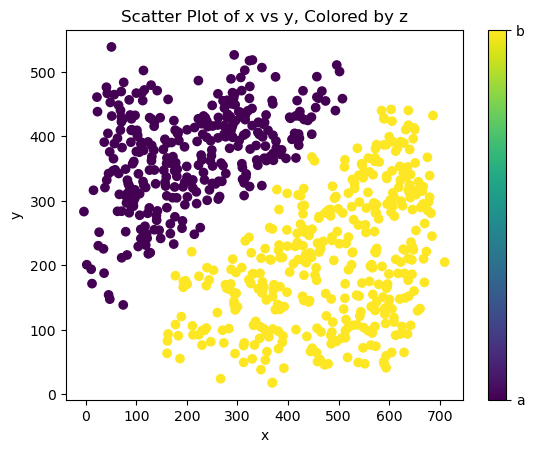

In [23]:
# Convert categorical 'z' to numeric values
numeric_z, unique_z = pd.factorize(data['z'])

# Scatter plot with 'x' and 'y' as coordinates, and numeric_z as the color
plt.scatter(data['x'], data['y'], c=numeric_z, cmap='viridis')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y, Colored by z')

# Add a colorbar with categorical labels
cbar = plt.colorbar()
cbar.set_ticks(range(len(unique_z)))  # Set ticks for each unique category
cbar.set_ticklabels(unique_z)  # Label ticks with the original categories

# Show the plot
plt.show()

In [24]:
X = data.drop('z',axis=1).values
y = data['z'].values

In [25]:
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
scaler  = StandardScaler()
y_encoded = label_encoder.fit_transform(y) 
X_scaled = scaler.fit_transform(X)

X_train , X_test , y_train , y_test = train_test_split(X_scaled,y_encoded,test_size=0.25,random_state=23)


In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

model.score(X_test,y_test)


0.9942857142857143

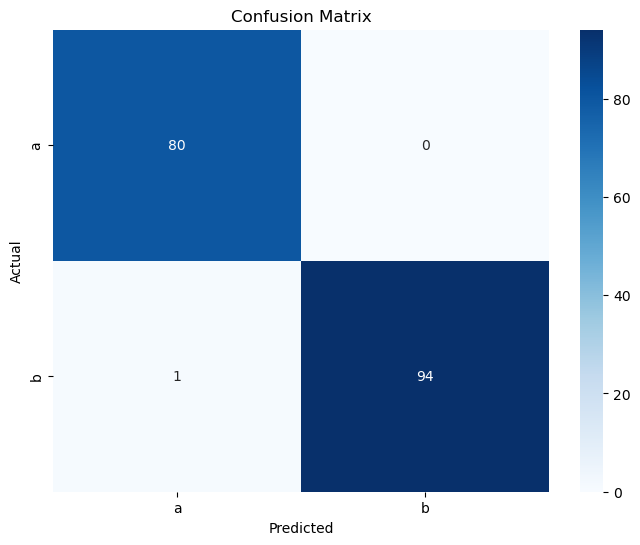

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


pred = model.predict(X_test)


cm = confusion_matrix(y_test, pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

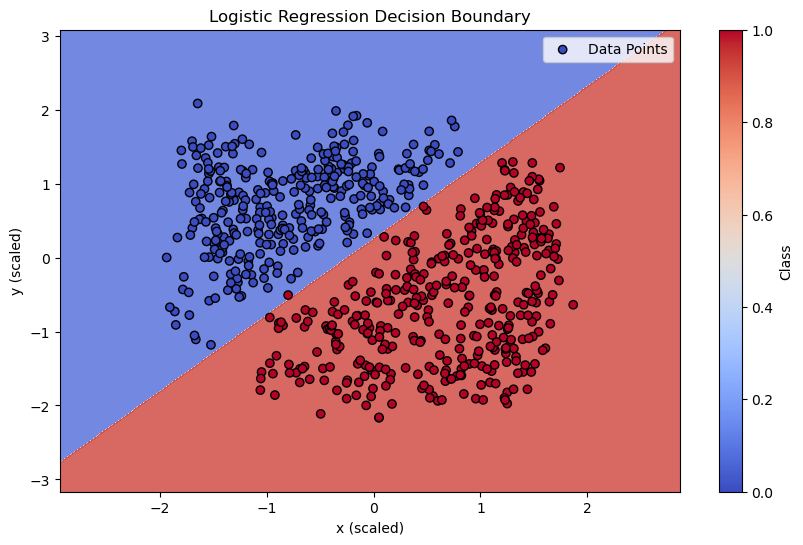

In [28]:
# Create a grid of points to cover the feature space
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and scatter plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # Decision boundary
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded, edgecolors='k', cmap='coolwarm', label='Data Points')  # Scatter plot
plt.xlabel('x (scaled)')
plt.ylabel('y (scaled)')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar(label='Class')
plt.legend()
plt.show()

# playing with drawndata2.csv file :

In [29]:
data2 = pd.read_csv(r'../data/drawndata2.csv')

data2.head()

,x,y,z
0,469.759355,453.574946,a
1,535.331819,435.221848,a
2,504.285526,437.767578,a
3,469.891398,368.371652,a
4,405.425622,403.141546,a


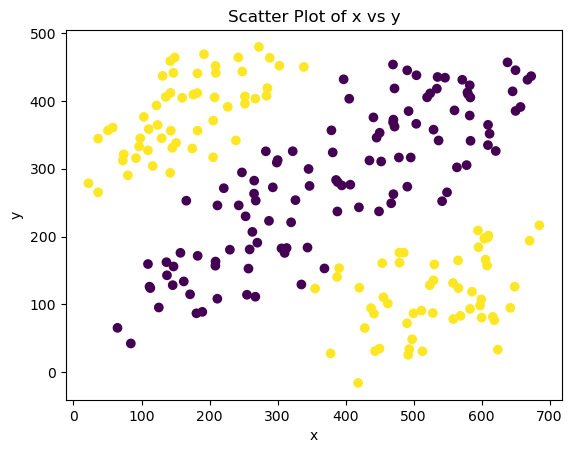

In [30]:
X2 = data2.drop('z',axis=1).values
y2 = data2['z']

numeric_z, unique_z = pd.factorize(data2['z'])


plt.scatter(data2['x'], data2['y'], c=numeric_z, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')


plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

X2_scaled = scaler.fit_transform(X2)
y2_scaled = label_encoder.fit_transform(y2)


poly = PolynomialFeatures()

X2_poly = poly.fit_transform(X2_scaled)

X2_train , X2_test , y2_train , y2_test = train_test_split(X2_poly,y2_scaled,test_size=0.2,random_state=23)

In [32]:
model2 = LogisticRegression()

model2.fit(X2_train,y2_train)

model2.score(X2_test,y2_test)

1.0

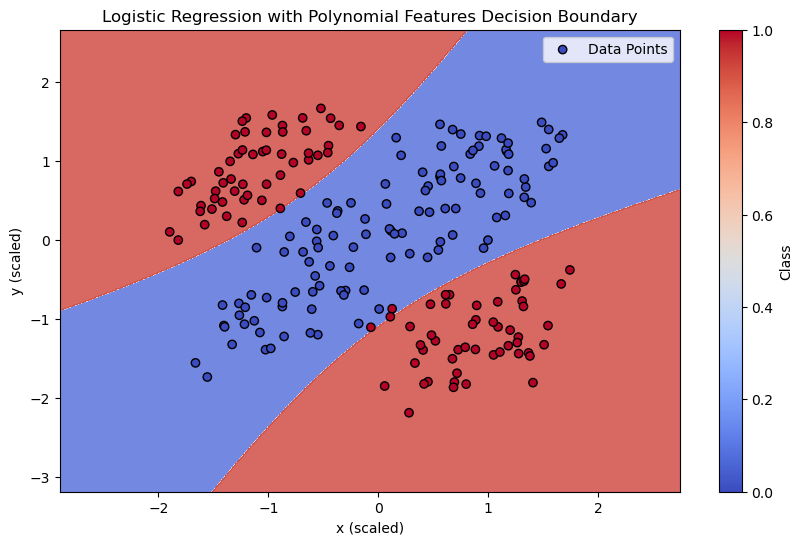

In [33]:
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_poly = poly.transform(grid_points)  

Z = model2.predict(grid_points_poly)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  
plt.scatter(X2_scaled[:, 0], X2_scaled[:, 1], c=y2_scaled, edgecolors='k', cmap='coolwarm', label='Data Points')  # Scatter plot
plt.xlabel('x (scaled)')
plt.ylabel('y (scaled)')
plt.title('Logistic Regression with Polynomial Features Decision Boundary')
plt.colorbar(label='Class')
plt.legend()
plt.show()

# Playing with drawndata1.csv file :

In [34]:
data3 = pd.read_csv(r'..\data\drawndata1.csv')

data3.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


Text(0.5, 1.0, 'exploring the data')

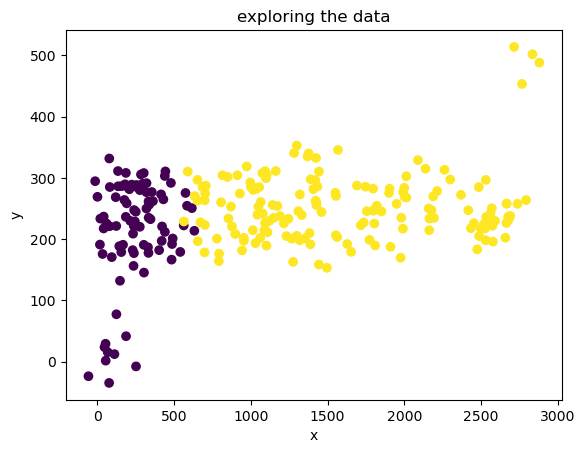

In [35]:

numeric_z, unique_z = pd.factorize(data3['z'])


plt.scatter(data3['x'],data3['y'],c=numeric_z,cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.title("exploring the data")

trying first with just scaling , and second with quantiles

In [36]:
X3 = data3.drop('z',axis=1).values
y3 = data3['z']


y3_labeled = label_encoder.fit_transform(y3)
X3_scaled = scaler.fit_transform(X3)


X3_poly = poly.fit_transform(X3_scaled)

X3_train , X3_test , y3_train , y3_test = train_test_split(X3_poly,y3_labeled,test_size=0.2,random_state=23)

In [37]:
model3 = LogisticRegression()

model3.fit(X3_train,y3_train)

model3.score(X3_test,y3_test)

0.9411764705882353

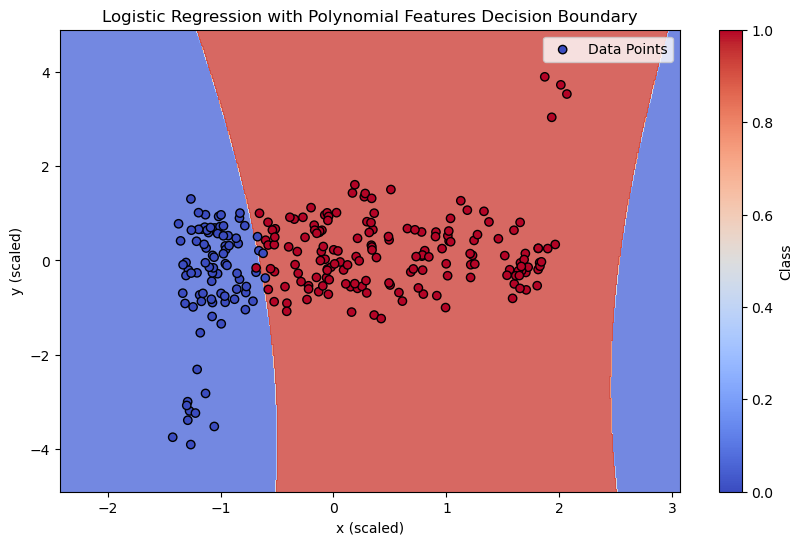

In [38]:
x_min, x_max = X3_scaled[:, 0].min() - 1, X3_scaled[:, 0].max() + 1
y_min, y_max = X3_scaled[:, 1].min() - 1, X3_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_poly = poly.transform(grid_points)  

Z = model3.predict(grid_points_poly)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  
plt.scatter(X3_scaled[:, 0], X3_scaled[:, 1], c=y3_labeled, edgecolors='k', cmap='coolwarm', label='Data Points')  # Scatter plot
plt.xlabel('x (scaled)')
plt.ylabel('y (scaled)')
plt.title('Logistic Regression with Polynomial Features Decision Boundary')
plt.colorbar(label='Class')
plt.legend()
plt.show()

In [39]:
from sklearn.preprocessing import QuantileTransformer

quant = QuantileTransformer(n_quantiles=100)

X3_quant = quant.fit_transform(X3)

X3_train , X3_test , y3_train , y3_test = train_test_split(X3_quant,y3_labeled,test_size=0.2,random_state=23)

model5 = LogisticRegression()

model5.fit(X3_train,y3_train)

model5.score(X3_test,y3_test)

0.9215686274509803

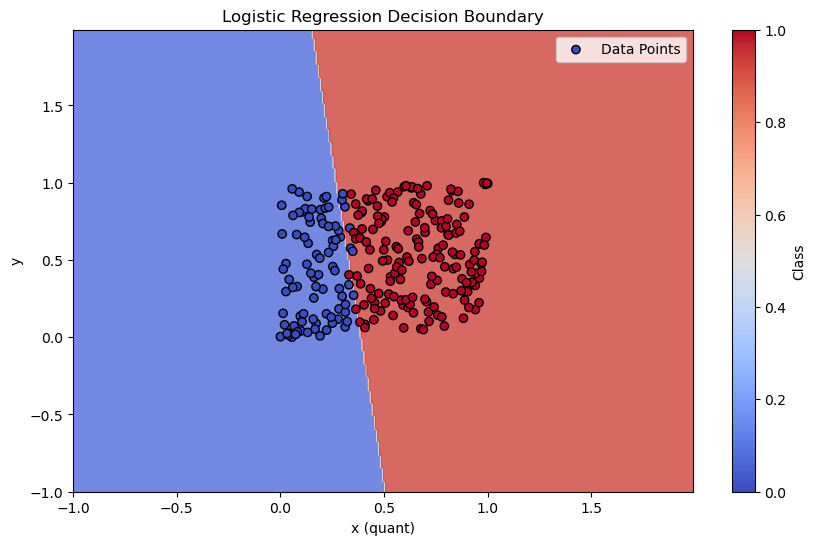

In [40]:
x_min, x_max = X3_quant[:, 0].min() - 1, X3_quant[:, 0].max() + 1
y_min, y_max = X3_quant[:, 1].min() - 1, X3_quant[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_poly = poly.transform(grid_points)  

Z = model5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and scatter plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # Decision boundary
plt.scatter(X3_quant[:, 0], X3_quant[:, 1], c=y3_labeled, edgecolors='k', cmap='coolwarm', label='Data Points')  # Scatter plot
plt.xlabel('x (quant)')
plt.ylabel('y')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar(label='Class')
plt.legend()
plt.show()